#### Exercise 2.5

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_* (a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_* (a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$  and longer runs, say of 10,000 steps.

In [20]:
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import random
import sys

In [84]:
def random_walk(x):
    increment = np.random.normal(0, 0.01, len(x))
    x += increment
    return x 

def bandit(x, i):
    return np.random.normal(x[i], 1)

def select_action(x, e):
    max_val = max(x)
    indx = [i for i, val in enumerate(x) if max_val == val]
    
    sample = np.random.binomial(1,e)
    
    if sample:
        return np.random.choice(range(len(x)))
    else:
        return np.random.choice(indx)
    
def bandit_solver(actions, max_iters, Qupdate="const_step", alpha=0.1, epsilon=0.1):
    Q = np.zeros(actions)
    if Qupdate == "simpl_avg":
        N = np.zeros(actions)
    
    Q_star = np.zeros(actions)
    rewards = np.zeros(max_iters)
    poa = np.zeros(max_iters)
    num_optimal_actions = 0
    for i in range(max_iters):
        A = select_action(Q, epsilon)
        
        max_val = max(Q_star)
        indx = [i for i, val in enumerate(Q_star) if max_val == val]
        if A in indx:
            num_optimal_actions += 1
        else:
            num_optimal_actions += 0
        
        poa[i] = np.round(num_optimal_actions*100/(i+1), 2)
        
        if Qupdate == "simpl_avg":
            N[A] += 1
        R = bandit(Q_star, A)
        Q_star = random_walk(Q_star)
        
        rewards[i] = R
        
        if Qupdate == "simpl_avg":
            Q[A] += (1/N[A])*(R - Q[A])
            
        elif Qupdate == "const_step":
            Q[A] += alpha*(R - Q[A])
    
    return rewards, poa

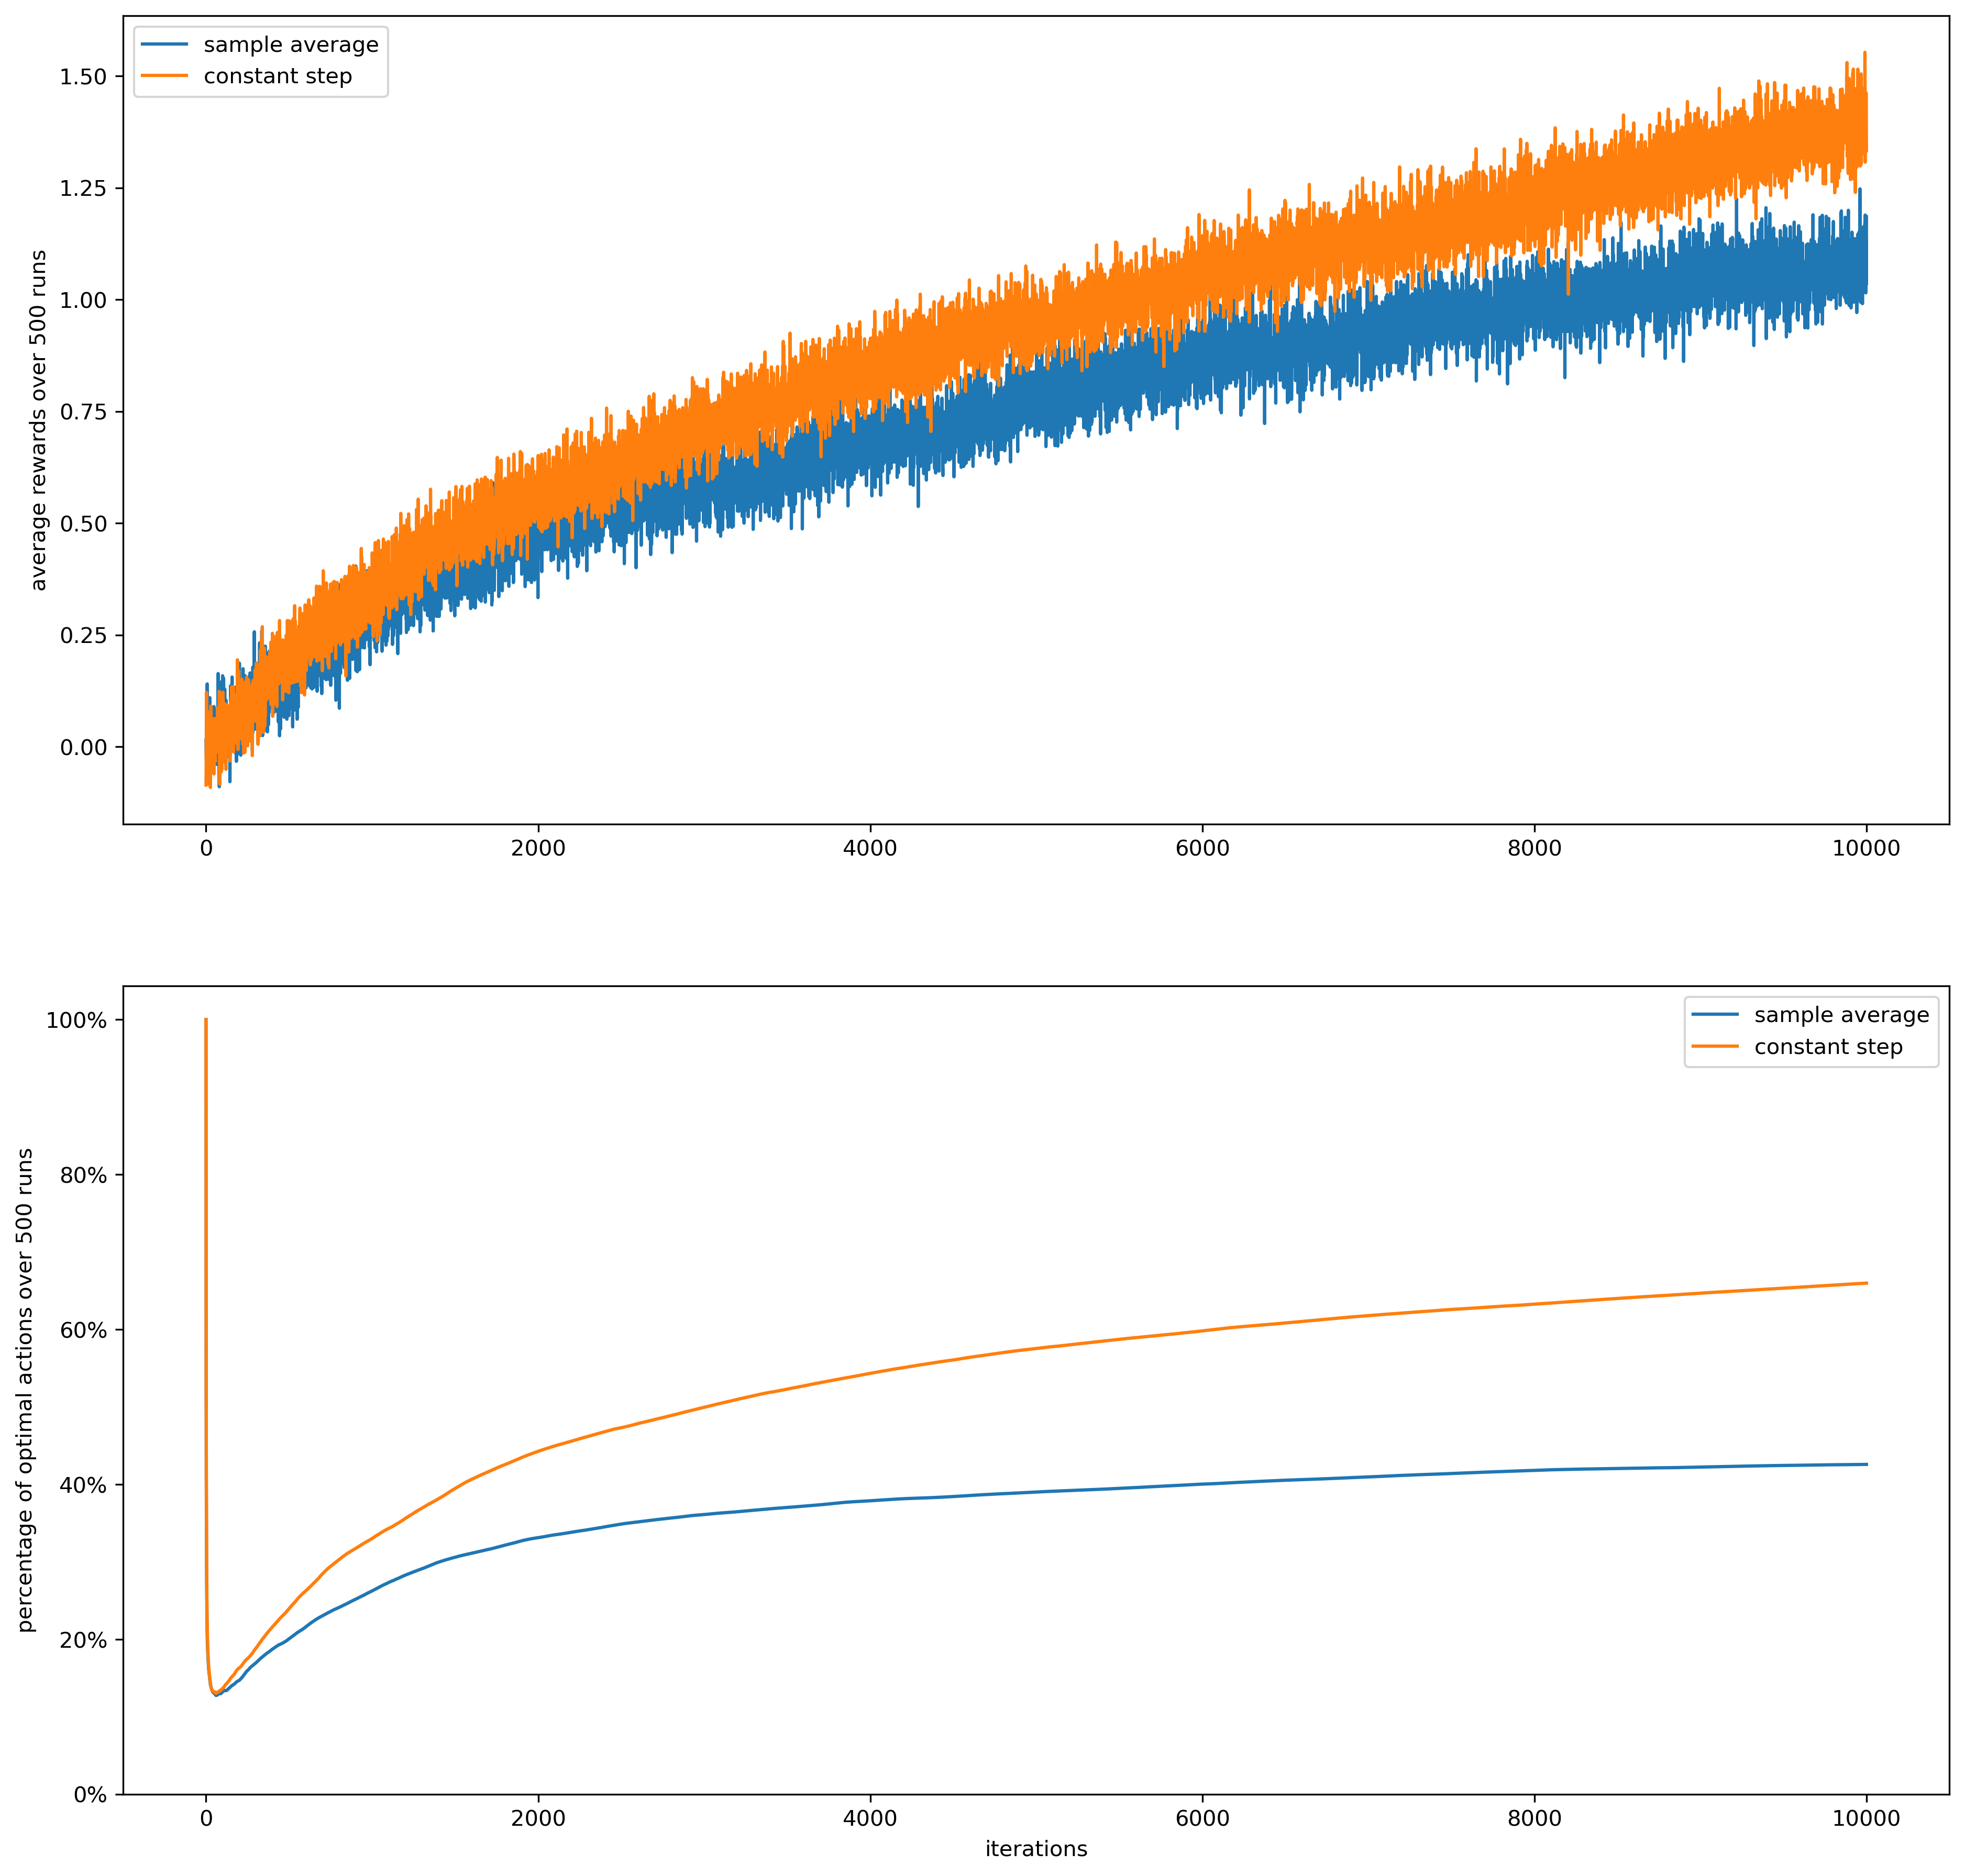

In [94]:
samp_avg_rewards_multiple = []
samp_avg_poa_multiple = []
const_step_rewards_multiple = []
const_step_poa_multiple = []

runs = 500
for i in range(runs):
    samp_avg_rewards, samp_avg_poa = bandit_solver(10, 10000, "simpl_avg")
    samp_avg_rewards_multiple.append(samp_avg_rewards)
    samp_avg_poa_multiple.append(samp_avg_poa)
    
    const_step_rewards, const_step_poa = bandit_solver(10, 10000)
    const_step_rewards_multiple.append(const_step_rewards)
    const_step_poa_multiple.append(const_step_poa)
    
samp_avg_rewards_multiple = np.array(samp_avg_rewards_multiple)
samp_avg_poa_multiple = np.array(samp_avg_poa_multiple)

const_step_rewards_multiple = np.array(const_step_rewards_multiple)
const_step_poa_multiple = np.array(const_step_poa_multiple)

samp_avg_rewards = np.mean(samp_avg_rewards_multiple, axis=0)
samp_avg_poa = np.mean(samp_avg_poa_multiple, axis=0)

const_step_rewards = np.mean(const_step_rewards_multiple, axis=0)
const_step_poa = np.mean(const_step_poa_multiple, axis=0)

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15), dpi=300)

ax1.plot(samp_avg_rewards, label="sample average")
ax1.plot(const_step_rewards, label="constant step")
ax1.set_ylabel(f'average rewards over {runs} runs')

ax2.plot(samp_avg_poa, label="sample average")
ax2.plot(const_step_poa, label="constant step")
ax2.set_ylabel(f'percentage of optimal actions over {runs} runs')
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.set_xlabel('iterations')

ax1.legend()
ax2.legend()
plt.show()